In [2]:
import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy import constants
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

step = False
r = False
n = True

p = f'/Users/max/HiPACE/Fork/hdf5/'
ip = f'/Users/max/HiPACE/Fork/insitu/'

data = defs.Functions(path = p, insitu_path = ip, n0 = 1e17, iteration = 0, normalized = n, recovery = r, mesh_refinement = True)

IA = constants.m_e * constants.c**3 / constants.e

data.customCMAP()

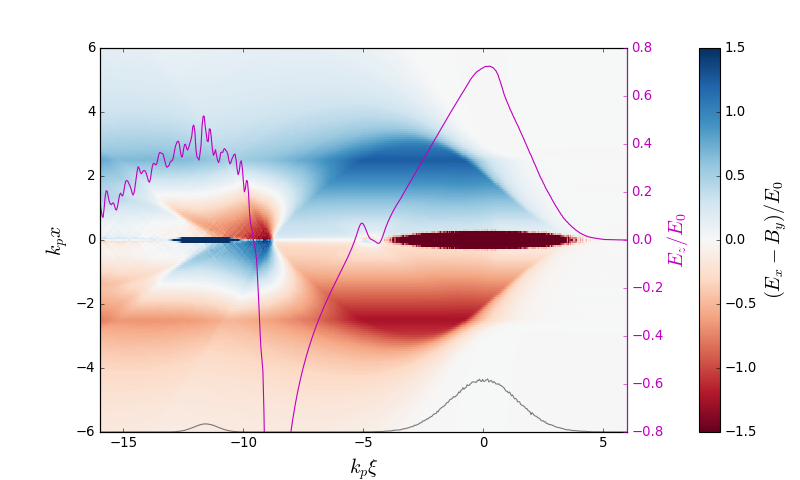

In [29]:
s = 1.5
col = 'm'
pd = .9
prfl = 'k'

plt.close()
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 6)) # , gridspec_kw={'width_ratios': [1.75, 1]})
# plt.subplots_adjust(hspace=0.075)

im = axs.pcolormesh(data.info.z, data.info.x, data.ExmBy.T, cmap = 'RdBu', vmin = -s, vmax = s) # level 0
axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.ExmBy_lev1.T, cmap = 'RdBu', vmin = -s, vmax = s) # level 1
axs.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15) # level 0
# axs.pcolormesh(data.info_lev1.z, data.info_lev1.x, data.jz_beam_lev1.T * IA, cmap = 'bwrT', vmin = -1e4, vmax = 1e4) # level 1
axs.plot(data.info.z, 1e-8 * data.profile[data.iteration] - 6, 'k', alpha = .5)

ax2 = axs.twinx()
ax2.plot(data.info.z, data.Ez, color = col) # level 0
# ax2.plot(data.info_lev1.z, data.Ez_lev1, color = 'k') # level 1
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1, fontsize = 18, color = col)
ax2.spines["right"].set_color(col)
# ax2.spines["left"].set_visible(False)
ax2.tick_params(axis='y', colors=col)
divider2 = make_axes_locatable(axs)
cax2 = divider2.append_axes("right", size = "4%", pad = pd)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = pd)
cax3.remove()
cb2 = plt.colorbar(im, cax = cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $', fontsize = 18)


axs.set_xlim(data.info.zmin, data.info.zmax)
axs.set_xlabel(r'$k_p\xi$', fontsize = 18)


axs.set_ylim(-6, 6)
axs.set_ylabel(r'$k_px$', fontsize = 18)

# plt.savefig('/Users/max/HiPACE/recovery/images/fNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()